In [1]:
#importing the library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [2]:
#collecting data
dataset = pd.read_csv('BOMH.csv')
dataset.head()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,1-January-2013,60.90,62.7,60.50,62.10,61.737213,125600,1134,7754194,46025.0,36.64,2.20,1.20
1,2-January-2013,62.15,63.1,61.60,61.75,62.385811,87657,854,5468553,39451.0,45.01,1.50,-0.40
2,3-January-2013,62.00,62.8,61.45,61.60,62.022855,103479,871,6418063,49693.0,48.02,1.35,-0.40
3,4-January-2013,62.10,62.8,61.65,62.55,62.248379,77112,759,4800097,31322.0,40.62,1.15,0.45
4,7-January-2013,62.45,64.6,62.45,64.20,63.906091,169121,1363,10807862,97831.0,57.85,2.15,1.75


In [3]:
dataset.isna().any()

Date                         False
Open Price                   False
High Price                   False
Low Price                    False
Close Price                  False
WAP                          False
No.of Shares                 False
No. of Trades                False
Total Turnover (Rs.)         False
Deliverable Quantity          True
% Deli. Qty to Traded Qty     True
Spread High-Low              False
Spread Close-Open            False
dtype: bool

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049 entries, 0 to 2048
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       2049 non-null   object 
 1   Open Price                 2049 non-null   float64
 2   High Price                 2049 non-null   float64
 3   Low Price                  2049 non-null   float64
 4   Close Price                2049 non-null   float64
 5   WAP                        2049 non-null   float64
 6   No.of Shares               2049 non-null   int64  
 7   No. of Trades              2049 non-null   int64  
 8   Total Turnover (Rs.)       2049 non-null   int64  
 9   Deliverable Quantity       2048 non-null   float64
 10  % Deli. Qty to Traded Qty  2048 non-null   float64
 11  Spread High-Low            2049 non-null   float64
 12  Spread Close-Open          2049 non-null   float64
dtypes: float64(9), int64(3), object(1)
memory usage:

<AxesSubplot:>

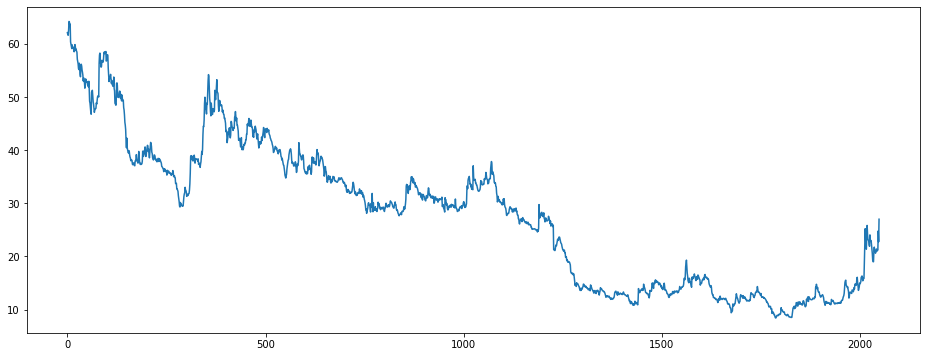

In [5]:
dataset['Close Price'].plot(figsize=(16,6))

In [6]:
dataset2=dataset.reset_index()['Close Price']
dataset2[:]

0       62.10
1       61.75
2       61.60
3       62.55
4       64.20
        ...  
2044    21.25
2045    21.20
2046    24.80
2047    22.75
2048    27.00
Name: Close Price, Length: 2049, dtype: float64

In [7]:
#LSTM are sensitive to the scale of the data, so we apply minmax scaler

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
dataset2=scaler.fit_transform(np.array(dataset2).reshape(-1,1))

In [9]:
print(dataset2)

[[0.9623521 ]
 [0.95607745]
 [0.95338831]
 ...
 [0.29365364]
 [0.25690212]
 [0.3330943 ]]


In [10]:
#splitting data set into train and test split
training_size=int(len(dataset2)*0.65)
test_size=len(dataset2)-training_size
train_data=dataset2[0:training_size , :]
test_data=dataset2[training_size:len(dataset2),:1]

In [11]:
print(training_size , test_size)

1331 718


In [12]:
import numpy
#convert an array of value into a dataset matrix
def create_dataset(dset,time_step=1):
    dataX , dataY = [], []
    for i in range(len(dset)-time_step-1):
        a = dset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dset[i + time_step,0])
    return numpy.array(dataX) , numpy.array(dataY)

In [13]:
#reshape into X=t, t+1,t+2,t+3 nad Y=t+4
time_step = 100
X_train , Y_train = create_dataset(train_data, time_step)
X_test , Y_test = create_dataset(test_data, time_step)

In [14]:
print(X_train, Y_tain)


NameError: name 'Y_tain' is not defined

In [15]:
print(X_test, Y_test)

[[0.09268555 0.08820366 0.08425959 ... 0.04840445 0.04338473 0.04679096]
 [0.08820366 0.08425959 0.08246683 ... 0.04338473 0.04679096 0.04463966]
 [0.08425959 0.08246683 0.0864109  ... 0.04679096 0.04463966 0.05647185]
 ...
 [0.05145213 0.05001793 0.05001793 ... 0.23090714 0.22552886 0.23001076]
 [0.05001793 0.05001793 0.05181068 ... 0.22552886 0.23001076 0.22911438]
 [0.05001793 0.05181068 0.05055575 ... 0.23001076 0.22911438 0.29365364]] [0.04463966 0.05647185 0.05252779 0.05306561 0.04822517 0.048763
 0.05198996 0.04786662 0.0442811  0.05844389 0.09913948 0.0916099
 0.08999641 0.08533525 0.08874148 0.09143062 0.09340265 0.09609179
 0.09519541 0.09842237 0.09286483 0.09447831 0.09394048 0.11401936
 0.10326282 0.10326282 0.0996773  0.09358193 0.08623162 0.08533525
 0.08425959 0.08192901 0.08300466 0.08228756 0.08139118 0.0752958
 0.07368232 0.06776622 0.07565436 0.0930441  0.08981714 0.092327
 0.08999641 0.09214772 0.11366081 0.11832198 0.11133023 0.10720688
 0.0996773  0.11563284 0.1

In [16]:
# reshape input to be [sample , time_steps  , features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0] , X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [17]:
#create the stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [18]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error' , optimizer='adam')

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.fit(X_train,Y_train, validation_data=(X_test,Y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 17s 424ms/step - loss: 0.0902 - val_loss: 0.0101
Epoch 2/100
20/20 [==============================] - 6s 310ms/step - loss: 0.0045 - val_loss: 0.0086
Epoch 3/100
20/20 [==============================] - 6s 309ms/step - loss: 0.0028 - val_loss: 0.0035
Epoch 4/100
20/20 [==============================] - 6s 310ms/step - loss: 0.0016 - val_loss: 7.6101e-04
Epoch 5/100
20/20 [==============================] - 6s 311ms/step - loss: 0.0014 - val_loss: 6.6048e-04
Epoch 6/100
20/20 [==============================] - 6s 312ms/step - loss: 0.0013 - val_loss: 6.6878e-04
Epoch 7/100
20/20 [==============================] - 6s 313ms/step - loss: 0.0012 - val_loss: 6.5378e-04
Epoch 8/100
20/20 [==============================] - 6s 315ms/step - loss: 0.0012 - val_loss: 6.0609e-04
Epoch 9/100
20/20 [==============================] - 6s 314ms/step - loss: 0.0012 - val_loss: 5.8711e-04
Epoch 10/100
20/20 [==============================] - 6s 316ms/ste

20/20 [==============================] - 6s 323ms/step - loss: 3.4649e-04 - val_loss: 3.1547e-04
Epoch 77/100
20/20 [==============================] - 6s 324ms/step - loss: 3.6613e-04 - val_loss: 3.3102e-04
Epoch 78/100
20/20 [==============================] - 6s 324ms/step - loss: 3.5113e-04 - val_loss: 3.5927e-04
Epoch 79/100
20/20 [==============================] - 6s 324ms/step - loss: 4.0065e-04 - val_loss: 2.9480e-04
Epoch 80/100
20/20 [==============================] - 7s 323ms/step - loss: 3.1001e-04 - val_loss: 3.5886e-04
Epoch 81/100
20/20 [==============================] - 6s 323ms/step - loss: 3.9456e-04 - val_loss: 2.7714e-04
Epoch 82/100
20/20 [==============================] - 6s 324ms/step - loss: 3.4621e-04 - val_loss: 3.2078e-04
Epoch 83/100
20/20 [==============================] - 6s 323ms/step - loss: 2.8401e-04 - val_loss: 3.2140e-04
Epoch 84/100
20/20 [==============================] - 6s 324ms/step - loss: 3.6001e-04 - val_loss: 2.8793e-04
Epoch 85/100
20/20 [===

In [40]:
import tensorflow as tf

In [41]:
#PREDICTION AND CHECK PERFORMANCE METRICS
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [42]:
# transform to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


In [43]:
#calculating RSME performance
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

34.60490568794157

In [44]:
#Test Data RSME
math.sqrt(mean_squared_error(Y_test,test_predict))

13.242041159925034

In [45]:
len(test_data)

718

In [46]:
X_input=test_data[618:].reshape(1,-1)
X_input.shape

(1, 100)

In [47]:
temp_input=list(X_input)
temp_input=temp_input[0].tolist()

In [48]:
temp_input

[0.05055575475080673,
 0.05306561491574041,
 0.050017927572606674,
 0.05055575475080673,
 0.05790605951954106,
 0.058085335245607744,
 0.060953746862674796,
 0.060595195410541425,
 0.06740767300107564,
 0.0720688418788096,
 0.07511652922194334,
 0.08282538544281101,
 0.10344209394048043,
 0.11939763356041594,
 0.12531373252061673,
 0.127465041233417,
 0.11186805306561493,
 0.10899964144854785,
 0.10595195410541414,
 0.10272499103621369,
 0.10487629974901397,
 0.09555396199354607,
 0.08892076012907854,
 0.06704912154894227,
 0.07224811760487629,
 0.08551452133381138,
 0.08694872714234492,
 0.0871280028684116,
 0.085155969881678,
 0.08318393689494444,
 0.08282538544281101,
 0.09411975618501253,
 0.09429903191107922,
 0.09125134456794548,
 0.08838293295087843,
 0.09268555037647902,
 0.10218716385801363,
 0.09770527070634635,
 0.11330225887414846,
 0.11491574040874863,
 0.11330225887414846,
 0.10989602007888133,
 0.11348153460021515,
 0.13391896737181785,
 0.1371459304410183,
 0.1190390821

In [49]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        #print(temp_input)
        X_input=np.array(temp_input[1:])
        print("{}day input {}".format(i,X_input))
        X_input=X_input.reshape(1,-1)
        X_input=X_input.reshape(1,n_steps,1)
        #print(x_input)
        yhat=model.predict(X_input,verbose=0)
        print("{} day out {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        X_input = X_input.reshape((1,n_steps,1))
        yhat = model.predict(X_input , verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        
print(lst_output)
        
        

[0.2828967]
101
1day input [0.05306561 0.05001793 0.05055575 0.05790606 0.05808534 0.06095375
 0.0605952  0.06740767 0.07206884 0.07511653 0.08282539 0.10344209
 0.11939763 0.12531373 0.12746504 0.11186805 0.10899964 0.10595195
 0.10272499 0.1048763  0.09555396 0.08892076 0.06704912 0.07224812
 0.08551452 0.08694873 0.087128   0.08515597 0.08318394 0.08282539
 0.09411976 0.09429903 0.09125134 0.08838293 0.09268555 0.10218716
 0.09770527 0.11330226 0.11491574 0.11330226 0.10989602 0.11348153
 0.13391897 0.13714593 0.11903908 0.10792399 0.0930441  0.0989602
 0.10397992 0.1174256  0.11545357 0.11796343 0.1226246  0.13678738
 0.13911796 0.14162782 0.1351739  0.12531373 0.13535317 0.13194693
 0.13445679 0.19146648 0.2599498  0.30100394 0.26873431 0.23825744
 0.23198279 0.27016852 0.31211904 0.28110434 0.2658659  0.26228039
 0.26048763 0.24704195 0.24166368 0.28020796 0.26048763 0.26048763
 0.26138401 0.24704195 0.23269989 0.21746146 0.19505199 0.18967372
 0.18967372 0.22373611 0.23897454 0.

9 day out [[0.29147214]]
10day input [0.07511653 0.08282539 0.10344209 0.11939763 0.12531373 0.12746504
 0.11186805 0.10899964 0.10595195 0.10272499 0.1048763  0.09555396
 0.08892076 0.06704912 0.07224812 0.08551452 0.08694873 0.087128
 0.08515597 0.08318394 0.08282539 0.09411976 0.09429903 0.09125134
 0.08838293 0.09268555 0.10218716 0.09770527 0.11330226 0.11491574
 0.11330226 0.10989602 0.11348153 0.13391897 0.13714593 0.11903908
 0.10792399 0.0930441  0.0989602  0.10397992 0.1174256  0.11545357
 0.11796343 0.1226246  0.13678738 0.13911796 0.14162782 0.1351739
 0.12531373 0.13535317 0.13194693 0.13445679 0.19146648 0.2599498
 0.30100394 0.26873431 0.23825744 0.23198279 0.27016852 0.31211904
 0.28110434 0.2658659  0.26228039 0.26048763 0.24704195 0.24166368
 0.28020796 0.26048763 0.26048763 0.26138401 0.24704195 0.23269989
 0.21746146 0.19505199 0.18967372 0.18967372 0.22373611 0.23897454
 0.22283973 0.22373611 0.21835783 0.22194335 0.23269989 0.23090714
 0.22552886 0.23001076 0.2291

18 day out [[0.29172]]
19day input [0.10272499 0.1048763  0.09555396 0.08892076 0.06704912 0.07224812
 0.08551452 0.08694873 0.087128   0.08515597 0.08318394 0.08282539
 0.09411976 0.09429903 0.09125134 0.08838293 0.09268555 0.10218716
 0.09770527 0.11330226 0.11491574 0.11330226 0.10989602 0.11348153
 0.13391897 0.13714593 0.11903908 0.10792399 0.0930441  0.0989602
 0.10397992 0.1174256  0.11545357 0.11796343 0.1226246  0.13678738
 0.13911796 0.14162782 0.1351739  0.12531373 0.13535317 0.13194693
 0.13445679 0.19146648 0.2599498  0.30100394 0.26873431 0.23825744
 0.23198279 0.27016852 0.31211904 0.28110434 0.2658659  0.26228039
 0.26048763 0.24704195 0.24166368 0.28020796 0.26048763 0.26048763
 0.26138401 0.24704195 0.23269989 0.21746146 0.19505199 0.18967372
 0.18967372 0.22373611 0.23897454 0.22283973 0.22373611 0.21835783
 0.22194335 0.23269989 0.23090714 0.22552886 0.23001076 0.22911438
 0.29365364 0.25690212 0.3330943  0.2828967  0.29483876 0.29714406
 0.29585415 0.29390025 0.292

27 day out [[0.28995186]]
28day input [0.08515597 0.08318394 0.08282539 0.09411976 0.09429903 0.09125134
 0.08838293 0.09268555 0.10218716 0.09770527 0.11330226 0.11491574
 0.11330226 0.10989602 0.11348153 0.13391897 0.13714593 0.11903908
 0.10792399 0.0930441  0.0989602  0.10397992 0.1174256  0.11545357
 0.11796343 0.1226246  0.13678738 0.13911796 0.14162782 0.1351739
 0.12531373 0.13535317 0.13194693 0.13445679 0.19146648 0.2599498
 0.30100394 0.26873431 0.23825744 0.23198279 0.27016852 0.31211904
 0.28110434 0.2658659  0.26228039 0.26048763 0.24704195 0.24166368
 0.28020796 0.26048763 0.26048763 0.26138401 0.24704195 0.23269989
 0.21746146 0.19505199 0.18967372 0.18967372 0.22373611 0.23897454
 0.22283973 0.22373611 0.21835783 0.22194335 0.23269989 0.23090714
 0.22552886 0.23001076 0.22911438 0.29365364 0.25690212 0.3330943
 0.2828967  0.29483876 0.29714406 0.29585415 0.29390025 0.29230598
 0.29133213 0.29096282 0.2910682  0.29147214 0.29199618 0.29249048
 0.29285115 0.29302496 0.29

In [50]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [51]:
import matplotlib.pyplot as plt

In [52]:
len(dataset2)

2049

In [53]:
dataset3=dataset2.tolist()
dataset3.extend(lst_output)

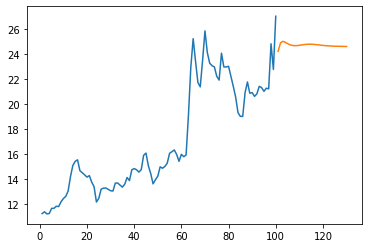

In [54]:
plt.plot(day_new,scaler.inverse_transform(dataset2[1949:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

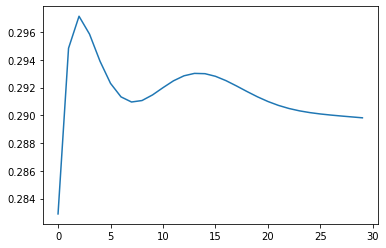

In [55]:
dataset3=dataset2.tolist()
dataset3.extend(lst_output)
plt.plot(dataset3[2049:])